# Spatial Analysis in Geology using R

## by Pedro Nogueira

##  <span style="color:red;">6. Basic statistics </span>

In [2]:
#06-00
# Settings


# Print the R version information
print(R.version)

# Verify thw working directory
wd_base = getwd()
print(wd_base)

               _                           
platform       aarch64-apple-darwin20      
arch           aarch64                     
os             darwin20                    
system         aarch64, darwin20           
status                                     
major          4                           
minor          3.1                         
year           2023                        
month          06                          
day            16                          
svn rev        84548                       
language       R                           
version.string R version 4.3.1 (2023-06-16)
nickname       Beagle Scouts               
[1] "/Users/pnogasmacmini/Documents/Jupyter Notebooks"


###  <span style="color:green;">6.1 A primer in exploratory analysis</span>

In [3]:
#06-01
# Load the library
library(sp)

# Load the data
data(meuse)

# Show the results
summary(meuse)

       x                y             cadmium           copper      
 Min.   :178605   Min.   :329714   Min.   : 0.200   Min.   : 14.00  
 1st Qu.:179371   1st Qu.:330762   1st Qu.: 0.800   1st Qu.: 23.00  
 Median :179991   Median :331633   Median : 2.100   Median : 31.00  
 Mean   :180005   Mean   :331635   Mean   : 3.246   Mean   : 40.32  
 3rd Qu.:180630   3rd Qu.:332463   3rd Qu.: 3.850   3rd Qu.: 49.50  
 Max.   :181390   Max.   :333611   Max.   :18.100   Max.   :128.00  
                                                                    
      lead            zinc             elev             dist        
 Min.   : 37.0   Min.   : 113.0   Min.   : 5.180   Min.   :0.00000  
 1st Qu.: 72.5   1st Qu.: 198.0   1st Qu.: 7.546   1st Qu.:0.07569  
 Median :123.0   Median : 326.0   Median : 8.180   Median :0.21184  
 Mean   :153.4   Mean   : 469.7   Mean   : 8.165   Mean   :0.24002  
 3rd Qu.:207.0   3rd Qu.: 674.5   3rd Qu.: 8.955   3rd Qu.:0.36407  
 Max.   :654.0   Max.   :1839.0   

In [4]:
#06-02/01
# Minimum of copper
min(meuse$copper)

[1] 14

In [5]:
#06-02/02
# Mean for zinc
mean(meuse$zinc)

[1] 469.7161

In [6]:
#06-02/03
# Median for copper
median(meuse$copper)

[1] 31

In [7]:
#06-03
# Count the frequencies
mode_table = table(meuse$zinc)

# What is the most common
mode_meuse_zinc = names(which.max(mode_table))

# Show the results
mode_meuse_zinc

[1] "180"

In [9]:
#06-04/01
# Range of the elevation data
range(meuse$elev)

[1]  5.18 10.52

In [10]:
#06-04/02
# Variance of the cadmium
var(meuse$cadmium)

[1] 12.41678

In [11]:
#06-04/03
# Copper standard deviation
sd(meuse$copper)

[1] 23.68044

###  <span style="color:green;">6.2 Handling outliers</span>

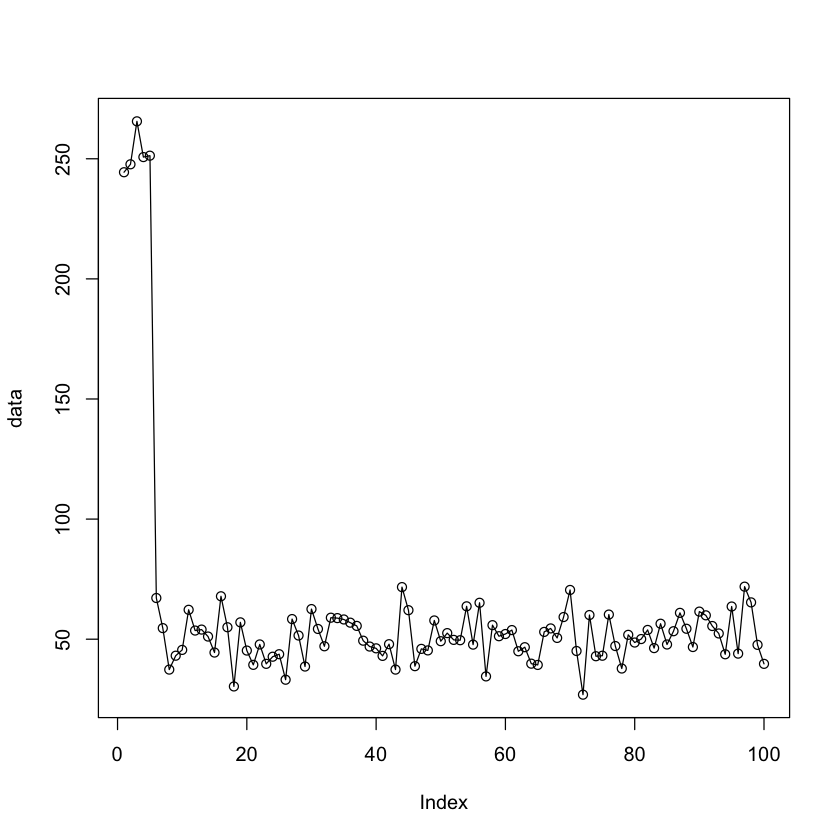

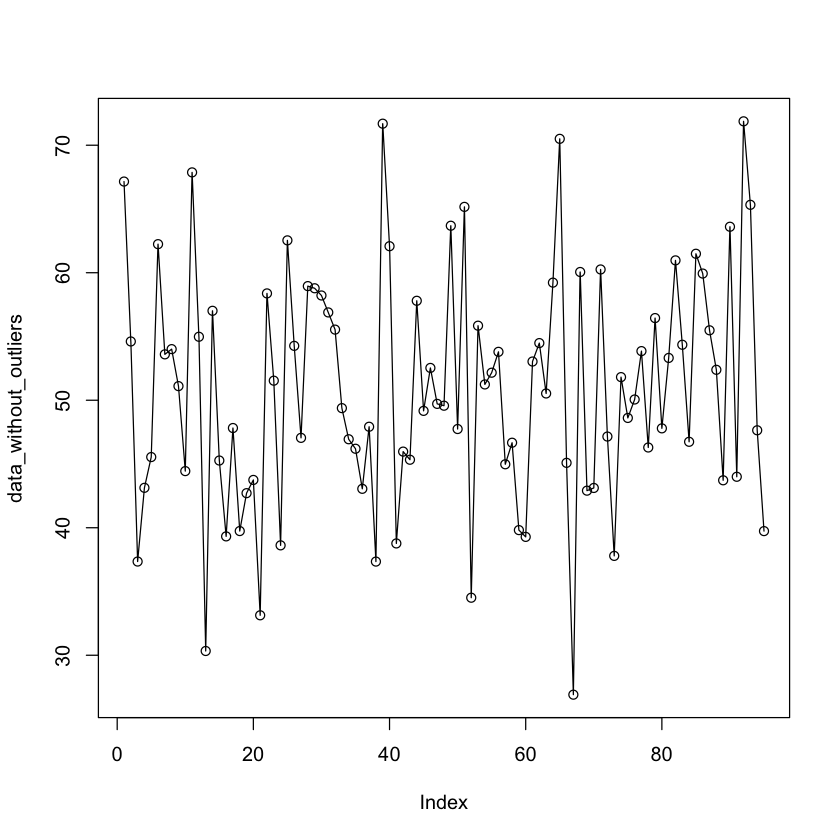

In [13]:
#06-05
# Data set with some outliers
set.seed(123)
data = rnorm(100, mean = 50, sd = 10)

# Create the outliers
data[1:5] = data[1:5] + 200

# Plot the data to visualise outliers
plot(data, type = "o")

# Use the "quantile" function to calculate the 1st and 3rd quartiles (25th and 75th percentiles)
q1 = quantile(data, probs = 0.25)
q3 = quantile(data, probs = 0.75)

# Calculate the interquartile range (IQR)
IQR = q3 - q1

# Use the 1.5 * IQR rule to identify outliers
outliers_min = q1 - 1.5 * IQR
outliers_max = q3 + 1.5 * IQR

# Use the "which" function to identify the positions of outliers in the data
outlier_index = which(data < outliers_min | data > outliers_max)

# Remove the outliers
data_without_outliers = data[-outlier_index]

# Plot the data without outliers
plot(data_without_outliers, type = "o")

###  <span style="color:green;">6.3 Correlating variables</span>

In [16]:
#06-06
# Create the minerals data frame
minerals = data.frame(mineral_names = c("Quartz", "Plagioclase", "Orthoclase", "Biotite", "Muscovite"), 
                      hardness = c(7, 6, 6, 2.5, 2.5), 
                      color = c("Clear", "White", "Pink", "Black", "Green"), 
                      density = c(2.65, 2.72, 2.6, 2.7, 2.8))

# Calculate the correlation matrix between the variables
cor_matrix = cor(as.numeric(minerals[,2]), as.numeric(minerals[,4]))

# Show the results
cor_matrix

[1] -0.6761714

###  <span style="color:green;">6.4 Inference statistics</span>

In [17]:
#06-07/01
# vector of density
density_values = c(6.8, 6.7, 6.6, 6.5, 6.3)

# Perform the t-test to a mean of 6.5
t.test(density_values, mu = 6.5, alternative = "two.sided", var.equal = TRUE)


	One Sample t-test

data:  density_values
t = 0.92998, df = 4, p-value = 0.405
alternative hypothesis: true mean is not equal to 6.5
95 percent confidence interval:
 6.341161 6.818839
sample estimates:
mean of x 
     6.58 


In [18]:
#06-07/02
# Perform the t-test to a mean of 3.2
t.test(density_values, mu = 3.2, alternative = "two.sided", var.equal = TRUE)


	One Sample t-test

data:  density_values
t = 39.292, df = 4, p-value = 2.507e-06
alternative hypothesis: true mean is not equal to 3.2
95 percent confidence interval:
 6.341161 6.818839
sample estimates:
mean of x 
     6.58 


In [19]:
#06-08
# Example of data
group1 = c(6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7)
group2 = c(7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7)

# Perform the t-test to compare the two groups
t.test(group1, group2)


	Welch Two Sample t-test

data:  group1 and group2
t = -8.165, df = 14, p-value = 1.079e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.2626816 -0.7373184
sample estimates:
mean of x mean of y 
     6.35      7.35 


In [20]:
#06-09
# Divide the data into three groups based on the elevation (6.5 and 8 metres)
group1 = meuse[meuse$elev > 8, ]
group2 = meuse[meuse$elev <= 8 & meuse$elev > 6.5, ]
group3 = meuse[meuse$elev <= 6.5, ]

# Create a new data frame with the zinc concentration and group
data = data.frame(
    value = c(group1$zinc, group2$zinc, group3$zinc),
    group = c(rep("group1", nrow(group1)), rep("group2", nrow(group2)),
    rep("group3", nrow(group3))) 
)

# Perform an ANOVA on the zinc concentration
aov_result = aov(value ~ group, data = data)

# Show the results
summary(aov_result)

             Df   Sum Sq Mean Sq F value   Pr(>F)    
group         2  7021254 3510627   38.87 2.33e-14 ***
Residuals   152 13729193   90324                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [21]:
#06-10/01
# Create a new data frame with the zinc concentration and elevation
data = data.frame(x = meuse$zinc, y = meuse$elev)

# Fit a linear regression model
reg_fit = lm(y ~ x, data = data)

# Summarise the results of the regression
summary(reg_fit)


Call:
lm(formula = y ~ x, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.44460 -0.62376  0.07227  0.52779  2.09075 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.9736397  0.1114095  80.546  < 2e-16 ***
x           -0.0017207  0.0001871  -9.196 2.57e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8524 on 153 degrees of freedom
Multiple R-squared:  0.356,	Adjusted R-squared:  0.3518 
F-statistic: 84.57 on 1 and 153 DF,  p-value: 2.568e-16


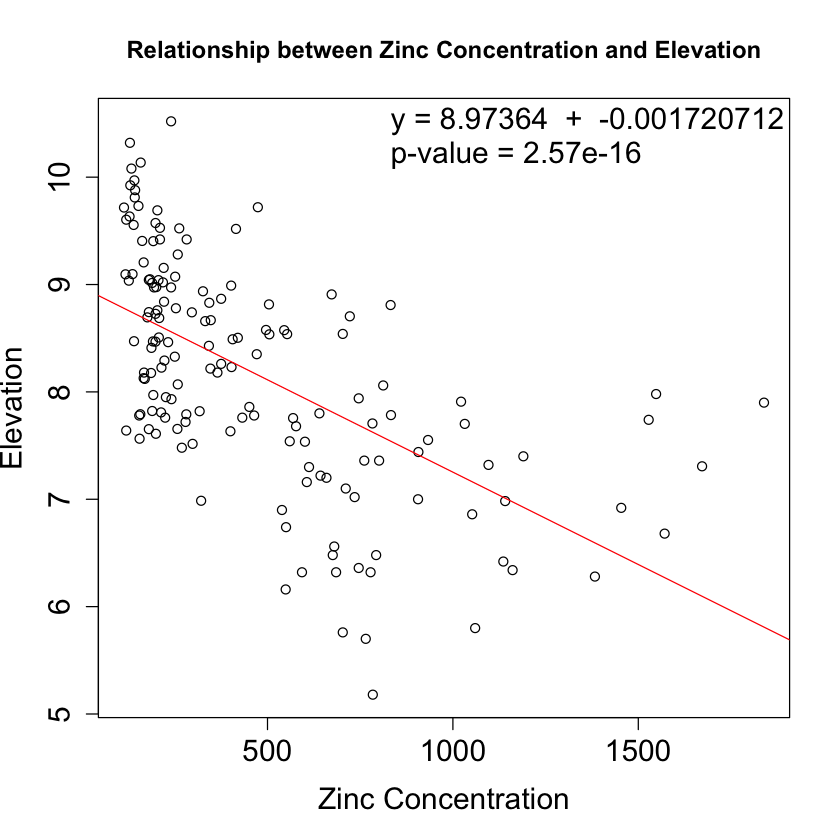

In [22]:
#06-10/02
# Plot the relationship between the zinc concentration and elevation
plot(data$x, data$y, xlab = "Zinc Concentration", ylab = "Elevation", 
     main = "Relationship between Zinc Concentration and Elevation", 
     cex.lab = 1.5, cex.axis = 1.5, 
     xlim = c(min(data$x), max(data$x)), ylim = c(min(data$y), max(data$y)))
abline(reg_fit, col = "red")

# Display the regression formula
text(800, max(data$y), paste("y =", format(reg_fit$coef[1]), " + ",
format(reg_fit$coef[2]), "x"), cex = 1.5, pos = 4)

# Display the p-value
text(800,10.2, paste("p-value =", format(summary(reg_fit)$coef[2,4],
digits = 3)), cex = 1.5, pos = 4)